<a href="https://colab.research.google.com/github/karthikvarkala/Mith/blob/main/Payment_Gateway_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description

A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction
due to its extremely low processing fees for handling online vendors’ digital payments.
This strategy has led to very low costs of acquiring new vendors.

Unfortunately, due to the cheap
processing fees, the company was
not able to able to build and deploy
a robust and fast fraud detection
system. Consequently, a lot of the
vendors have accumulated
significant economic burden due to
handling fraudulent transactions on
their platforms. This has resulted in
a significant number of current clients leaving IndAvenue’s payment gateway platform
for more expensive yet reliable payment gateway companies. 
The company’s data engineers curated a dataset that they believe follows the real
world distribution of transactions on their payment gateway. The company hired

Insofe and provided it with the dataset, to create a fast and robust AI based model
that can detect and prevent fraudulent transactions on its payment gateway

#Loading the required libraries

In [ ]:
import pandas as pd
import numpy as np

# Loading the data

In [ ]:
data=pd.read_csv("train_data-1611220940820.csv")
test_data=pd.read_csv("test_data-1611220982388.csv")

#Number row and columns

In [ ]:
data.shape,test_data.shape  # records and # columns

((76529, 11), (19133, 10))

## First and last 5 records

In [ ]:
data.head() # snapshot of the data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [ ]:
data.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [ ]:
data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [ ]:
test_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        19133 non-null  int64  
 1   user_id                   19133 non-null  int64  
 2   payment_method            19133 non-null  object 
 3   partner_id                19133 non-null  int64  
 4   partner_category          19133 non-null  object 
 5   country                   19133 non-null  object 
 6   device_type               19133 non-null  object 
 7   money_transacted          19133 non-null  float64
 8   transaction_initiation    19133 non-null  object 
 9   partner_pricing_category  19133 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.5+ MB


#Description of data

In [ ]:
#summary of data
data.describe(include="all") 

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


In [ ]:
test_data.describe(include="all")

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133,19133.000000,19133,19133,19133,19133.000000,19133,19133.000000
unique,NaN,NaN,6,NaN,8,1,4,NaN,19090,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN
freq,NaN,NaN,7651,NaN,9099,19133,11375,NaN,5,NaN
mean,7.037622e+14,1.261609e+07,NaN,58656.424084,NaN,NaN,NaN,140.886995,NaN,2.257043
std,7.946458e+14,1.228365e+07,NaN,36692.507399,NaN,NaN,NaN,2883.975048,NaN,0.735934
min,1.000000e+00,3.600000e+01,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000
25%,4.313645e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000
50%,3.585617e+14,9.922500e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000
75%,1.184018e+15,1.796064e+07,NaN,78890.000000,NaN,NaN,NaN,60.000000,NaN,2.000000


#Data types

In [ ]:
data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [ ]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

In [ ]:
data.drop(["transaction_number","user_id","partner_id"],axis=1,inplace=True)
test_data.drop(["transaction_number","user_id","partner_id"],axis=1,inplace=True)


####checking the correlation between numeric attributs by ploting correlation plot

In [ ]:
data.corr()

,money_transacted,partner_pricing_category,is_fraud
money_transacted,1.000000,-0.066396,0.570388
partner_pricing_category,-0.066396,1.000000,-0.034002
is_fraud,0.570388,-0.034002,1.000000


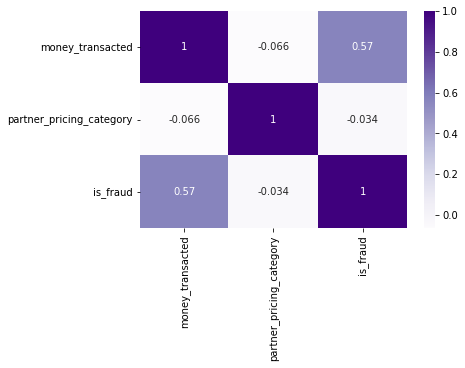

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),cmap="Purples",annot=True)

#Droping unwanted columns

In [ ]:
data.drop(["country"],axis=1,inplace=True)

In [ ]:
test_data.drop(["country"],axis=1,inplace=True)

In [ ]:
#checking columns after droping 
data.columns

Index(['payment_method', 'partner_category', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

#Extracting year,month,day,time from transaction_initiation(Feature Engineering)

In [ ]:
data['transaction_initiation'] = pd.to_datetime(data['transaction_initiation'])

In [ ]:
test_data['transaction_initiation'] = pd.to_datetime(test_data['transaction_initiation'])

In [ ]:
data['year'] = data['transaction_initiation'].dt.year
data['month'] = data['transaction_initiation'].dt.month
data['day'] = data['transaction_initiation'].dt.day
data['time'] = data['transaction_initiation'].dt.time
data.drop(columns='transaction_initiation', axis='column', inplace=True)

In [ ]:
test_data['year'] = test_data['transaction_initiation'].dt.year
test_data['month'] = test_data['transaction_initiation'].dt.month
test_data['day'] = test_data['transaction_initiation'].dt.day
test_data['time'] = test_data['transaction_initiation'].dt.time
test_data.drop(columns='transaction_initiation', axis='column', inplace=True)

In [ ]:
data.columns

Index(['payment_method', 'partner_category', 'device_type', 'money_transacted',
       'partner_pricing_category', 'is_fraud', 'year', 'month', 'day', 'time'],
      dtype='object')

In [ ]:
test_data.columns

Index(['payment_method', 'partner_category', 'device_type', 'money_transacted',
       'partner_pricing_category', 'year', 'month', 'day', 'time'],
      dtype='object')

In [ ]:
data.dtypes

payment_method               object
partner_category             object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
year                          int64
month                         int64
day                           int64
time                         object
dtype: object

In [ ]:
data.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day,time
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2,0,2016,11,15,19:16:12
1,e_wallet_payments,cat_2,other_pcs,100.0,2,0,2017,1,11,09:25:33
2,e_wallet_payments,cat_2,other_pcs,50.0,2,0,2016,12,7,07:58:09
3,other_debit_cards,cat_3,other_pcs,1000.0,2,0,2017,1,11,16:15:44
4,other_debit_cards,cat_1,other_pcs,200.0,2,0,2016,11,16,17:04:42


In [ ]:
data.drop(["time"],axis=1,inplace=True)


In [ ]:
test_data.drop(["time"],axis=1,inplace=True)

#grouping object type veriable

In [ ]:
#collecting all the object attributes into obj_atr
obj_atr=data.select_dtypes(["object"]).columns

In [ ]:
obj_atr

Index(['payment_method', 'partner_category', 'device_type'], dtype='object')

#converting object type to categorical

In [ ]:
data[obj_atr]=data[obj_atr].astype("category")

In [ ]:
data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
year                           int64
month                          int64
day                            int64
dtype: object

In [ ]:
test_data[obj_atr]=test_data[obj_atr].astype("category")

In [ ]:
test_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
year                           int64
month                          int64
day                            int64
dtype: object

#Checking the frequency of target variable

In [ ]:
data["is_fraud"].value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

#Creating dummies

In [ ]:
data=pd.get_dummies(data)

In [ ]:
test_data=pd.get_dummies(test_data)

In [ ]:
data.shape,test_data.shape 

((76529, 25), (19133, 23))

In [ ]:
data.dtypes 

money_transacted                             float64
partner_pricing_category                       int64
is_fraud                                       int64
year                                           int64
month                                          int64
day                                            int64
payment_method_e_wallet_payments               uint8
payment_method_other_debit_cards               uint8
payment_method_sbi_atm_cum_debit_card          uint8
payment_method_unified_payments_interface      uint8
payment_method_visa_master_credit_cards        uint8
payment_method_visa_master_debit_cards         uint8
partner_category_cat_1                         uint8
partner_category_cat_2                         uint8
partner_category_cat_3                         uint8
partner_category_cat_4                         uint8
partner_category_cat_5                         uint8
partner_category_cat_6                         uint8
partner_category_cat_7                        

In [ ]:
test_data.dtypes

money_transacted                             float64
partner_pricing_category                       int64
year                                           int64
month                                          int64
day                                            int64
payment_method_e_wallet_payments               uint8
payment_method_other_debit_cards               uint8
payment_method_sbi_atm_cum_debit_card          uint8
payment_method_unified_payments_interface      uint8
payment_method_visa_master_credit_cards        uint8
payment_method_visa_master_debit_cards         uint8
partner_category_cat_1                         uint8
partner_category_cat_2                         uint8
partner_category_cat_3                         uint8
partner_category_cat_4                         uint8
partner_category_cat_5                         uint8
partner_category_cat_6                         uint8
partner_category_cat_7                         uint8
partner_category_cat_8                        

#spliting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=data["is_fraud"]
X=data.drop(["is_fraud","partner_category_cat_9"],axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 23)
(15306, 23)
(61223,)
(15306,)


## Data standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

grouping numerical attributes

In [ ]:
num_atr=X_train.select_dtypes(["int64","float64"]).columns

In [ ]:
num_atr_test=test_data.select_dtypes(["int64","float64"]).columns

In [ ]:
num_atr_test

Index(['money_transacted', 'partner_pricing_category', 'year', 'month', 'day'], dtype='object')

In [ ]:
num_atr

Index(['money_transacted', 'partner_pricing_category', 'year', 'month', 'day'], dtype='object')

In [ ]:
scalar=StandardScaler()

In [ ]:
scalar.fit_transform(X_train[num_atr])



array([[ 0.02571327, -0.34784896,  1.00861229, -0.87711912, -1.66233443],
       [-0.04722154, -0.34784896, -0.99146125,  1.037492  , -1.21562517],
       [-0.05579544, -0.34784896,  1.00861229, -1.06858023,  0.68288919],
       ...,
       [-0.05556853, -0.34784896, -0.99146125,  1.037492  ,  1.4646304 ],
       [-0.05127348, -0.34784896, -0.99146125,  0.84603089,  1.4646304 ],
       [-0.05127348, -0.34784896,  1.00861229, -1.06858023, -1.10394786]])

In [ ]:
scalar.transform(X_test[num_atr])


array([[-0.01480607,  2.38350374, -0.99146125,  1.037492  , -1.66233443],
       [-0.0561358 , -0.34784896, -0.99146125,  1.037492  ,  1.35295308],
       [-0.05127348,  2.38350374,  1.00861229, -1.06858023, -0.43388396],
       ...,
       [-0.05553611, -0.34784896,  1.00861229, -0.87711912, -0.65723859],
       [-0.09584476, -0.34784896,  1.00861229, -1.06858023,  1.01792114],
       [-0.0559332 , -0.34784896, -0.99146125,  1.037492  ,  0.90624382]])

In [ ]:
scalar.transform(test_data[num_atr_test])

array([[ 0.02571327, -0.34784896, -0.99146125,  1.037492  ,  1.35295308],
       [-0.04722154, -0.34784896, -0.99146125,  1.037492  , -0.21052933],
       [-0.09584476, -0.34784896,  1.00861229, -1.06858023,  0.57121188],
       ...,
       [-0.04722154,  2.38350374, -0.99146125,  1.037492  ,  0.90624382],
       [-0.25792213,  2.38350374, -0.99146125,  1.037492  , -1.32730249],
       [-0.03911768, -0.34784896,  1.00861229, -1.06858023, -0.43388396]])

# Error metrics

In [ ]:
from sklearn.metrics import f1_score

##Model building

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi=LogisticRegression()

In [ ]:
logi.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
train_pred=logi.predict(X_train)
test_pred=logi.predict(X_test)

In [ ]:
print("f1_score on train data",f1_score(y_train,train_pred))

f1_score on train data 0.42391304347826086


In [ ]:
print("f1_score on test data",f1_score(y_test,test_pred))

f1_score on test data 0.5217391304347827


#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_pred=dtc.predict(X_train)
test_pred=dtc.predict(X_test)

In [ ]:
print("f1_score on train",f1_score(y_train,train_pred))

f1_score on train 0.979757085020243


In [ ]:
print("f1_score on test",f1_score(y_test,test_pred))

f1_score on test 0.9491525423728813


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

In [ ]:
print("f1_score on train",f1_score(y_train,train_pred))
print("f1_score on test",f1_score(y_test,test_pred))

f1_score on train 0.979757085020243
f1_score on test 0.896551724137931


#Best model predictions on test data

#DecisionTreeClassifier

In [ ]:
predictions=dtc.predict(test_data)

In [ ]:
predictions[0:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
for i in data:
  print(i)

money_transacted
partner_pricing_category
is_fraud
year
month
day
payment_method_e_wallet_payments
payment_method_other_debit_cards
payment_method_sbi_atm_cum_debit_card
payment_method_unified_payments_interface
payment_method_visa_master_credit_cards
payment_method_visa_master_debit_cards
partner_category_cat_1
partner_category_cat_2
partner_category_cat_3
partner_category_cat_4
partner_category_cat_5
partner_category_cat_6
partner_category_cat_7
partner_category_cat_8
partner_category_cat_9
device_type_android_devices
device_type_ios_devices
device_type_other_pcs
device_type_windows_pcs


In [ ]:
for j in test_data:
  print(j)

money_transacted
partner_pricing_category
year
month
day
payment_method_e_wallet_payments
payment_method_other_debit_cards
payment_method_sbi_atm_cum_debit_card
payment_method_unified_payments_interface
payment_method_visa_master_credit_cards
payment_method_visa_master_debit_cards
partner_category_cat_1
partner_category_cat_2
partner_category_cat_3
partner_category_cat_4
partner_category_cat_5
partner_category_cat_6
partner_category_cat_7
partner_category_cat_8
device_type_android_devices
device_type_ios_devices
device_type_other_pcs
device_type_windows_pcs


#converting predictions to csv file

In [ ]:
predictions= pd.DataFrame(predictions, columns=['is_fraud']).to_csv('prediction.csv',index=False)

#XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
XGB = xgb.XGBClassifier(n_estimators=500).fit(X_train, y_train)

In [ ]:
train_pred=XGB.predict(X_train)
test_pred=XGB.predict(X_test)

In [ ]:
print("f1_score on train",f1_score(y_train,train_pred))
print("f1_score on test",f1_score(y_test,test_pred))

f1_score on train 0.9758064516129032
f1_score on test 0.9122807017543859


In [ ]:
xgbc=XGB.predict(test_data)

In [ ]:
xgbc[0:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
xgb_predictions= pd.DataFrame(xgbc, columns=['is_fraud']).to_csv('XGBprediction.csv',index=False)